In [4]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
#from tkinter import *


In [2]:
#fonctions utilisés pour afficher l'images "img[i]"
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

    

In [3]:
#afficher les probas avec un diagramme en baton
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



In [4]:

#Hello world
print("salut")
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))


salut
b'Hello, TensorFlow!'


In [5]:
#On utilise des jeux de données fournis par Keras appellés "fashion_mnist"
fashion=keras.datasets.fashion_mnist 

#On charge ces donnnées:
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

In [6]:
#train_images: 60 000 images de 28*28 pixel qui vont servir pour l'entrainement. Chaque image est représentée par une liste de liste 
#(tableau 2 dimenssions) d'entiers entre 0 et 255. Chaque entier représente l'intenssitée lumineuse d'un pixel. 
#train_labels: 
print(train_images)
train_images.shape #affiche les dimenssions. 

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


(60000, 28, 28)

In [7]:
#Il y a 10 labels différents (i.e type de fringues différents) numérotés de 0 à 9. 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Pour chaque image de 'train_image', il y a un label (i.e un nombre entre 0 et 9) correspondant dans 'train_labels'.
#'train_labels' est une liste de int entre 0 et 9.
print(train_labels)

[9 0 0 ... 3 0 5]


In [8]:
#test_images et test_labels sont respectivement similaires (du point de vu structurel) à 'train_image' et 'train_labels'.
#Sauf qu'ils vont servir à tester le modèle.
test_images.shape

(10000, 28, 28)

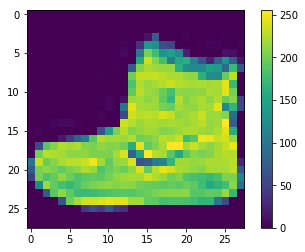

In [9]:
#On Visualise les données. Rappel: import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0]) #Affiche la première image de train_images
plt.colorbar() #Affiche la barre de couleur à droite de l'image. 
plt.grid(False)


In [10]:
#On transforme les entiers contenus dans train_images et test_image en float. On les divise par 255.0 pour qu'ils soient
#compris entre 0 et 1.
train_images = train_images / 255.0

test_images = test_images / 255.0


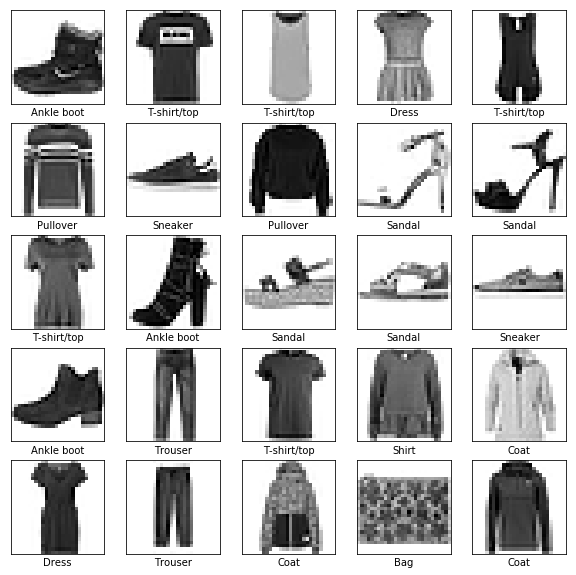

In [11]:
plt.figure(figsize=(10,10)) # Crée une figure de taille 10*10
for i in range(25):
    plt.subplot(5,5,i+1) #Fonctionne comme subplot dans matlab
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)#Si on ne met pas 'cmap=plt.cm.binary', les images ne seront pas en noir et blanc
    plt.xlabel(class_names[train_labels[i]]) #Donne un nom à l'axe des abscisses, ce qui dans notre cas revient 
    #à mettre un titre en dessous des images.
    #Rappel: class_names est la liste que l'on a crée précédement et qui contient les noms des labels
    


In [12]:
#Création du modèle
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Cette première couche tranforme un tableau 2D en un vecteur à une dimenssion
    # de taille 28*28=784. 
    
    #Le premier argument est le nombre de neuronnes dans la couche
    #Le second est la fonction d'activations des neuronnes
    keras.layers.Dense(128, activation=tf.nn.relu), 
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


#On peut aussi faire comme cela:
#modele1=keras.Sequential()
#modele1.add(keras.layers.Flatten(input_shape=(28, 28)))
#modele1.add( keras.layers.Dense(128, activation=tf.nn.relu))
#modele1.add(keras.layers.Dense(10, activation=tf.nn.softmax))

In [13]:
#Avant de lancer l'apprentissage, on doit faire quelques paramètrages:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
#Avec cette commande, on lance l'apprentissage:
model.fit(train_images, train_labels, epochs=5) # epochs: nombre de fois que l'on va faire passer l'enssemble des...
#... données d'entrainement dans le réseau de neuronne pour l'entrainement.


#A chaque epoch, le modèle affiche l'erreur (loss) et la précision (accuracy) attinte.

Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.4983 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3791 - acc: 0.8632
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3410 - acc: 0.8755
Epoch 4/5
60000/60000 [==============================] - 2s 42us/step - loss: 0.3144 - acc: 0.8859
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.2967 - acc: 0.8908


In [17]:
# On evalue les performances du modèle qu'on vient de crée en regardant comment il se débrouille les images de test:
test_loss, test_acc = model.evaluate(test_images, test_labels) 

print('Test accuracy:', test_acc)
#On constate que la précision atteinte sur ces données de test (0.8765), est inférieure à celle atteinte lors de...
#...l'entrainement (0.8909). Cela est due au surapprentissage (overfitting) effectué par le modèle sur les données d'entrainement


10000/10000 [==============================] - 0s 24us/step
Test accuracy: 0.8728


In [18]:
#On peut utiliser le modèle pour faire des prédictions: associer à une image, un label.
predictions = model.predict(test_images) #Le vecteur "prediction" contient les predictions pour les images de "test_images"

predictions[0]
#Une prediction est un tableau de 10 nombres, correspondants chaqun à la probabilité que l'image appartienne à une des ...
#...10 catégories d'habits répértoriés dans "class_names"
#Par exemple: la première image de test_data a une probabilité de 1.59e⁻05 d'être un'T-shirt/top' (class_names[0]) 
# Ou encore une proba de 1.70e⁻07 d'être un 'Trouser' (class_names[1])

array([1.89965147e-06, 1.01733924e-07, 2.40100775e-07, 5.42330270e-09,
       9.59375143e-07, 8.98213033e-03, 1.24812777e-06, 1.22553399e-02,
       7.29300893e-07, 9.78757322e-01], dtype=float32)

In [19]:
#Pour voir quel label a la probabilité la plus haute de correspondrre à l'image test_images[0]:
np.argmax(predictions[0])

9

In [20]:
# Le modèle affirme que le label le plus probable pour la première image est 'Ankle boot' (class_names[9])
#On peut vérifier ce résultat avec:
test_labels[0]


9

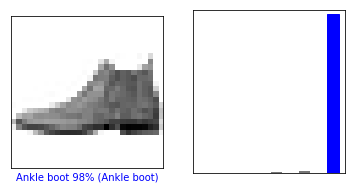

In [21]:
#On va maintenant visualiser ces résultats avec les deux fonctions 'plot_image' et 'plot_value_array' qui ...
#...sont définies au début de ce notebook
i = 0
plt.figure(figsize=(6,3))  #On crée une figure de longueur 6 et de largeur 3
plt.subplot(1,2,1)  #Cette figure on la partitionne en 2 et on se met dans la première moitiée
plot_image(i, predictions, test_labels, test_images) #Affiche l'image i. (première image en partant de la gauche)
#La legende en bas : 'label prédit par le modèle', 'pourcentage de confiance', '(Le vrai label de l'image)' 
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)#Affiche le diagramme en baton modèlisant les 10 probabilités trouvées par...
#... le modèle et stockées dans prediction[i].

#Ici le label prédit par le modèle est bon.

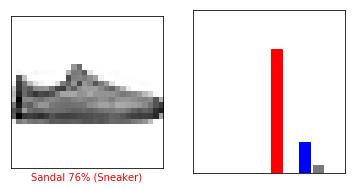

In [22]:
#On refait la même chose pour l'image d'indice 12:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

#Cette fois le modèle s'est trompé: On peut voir sur le diagramme en baton que la barre représentant la...
#probabilité associée au bon label est en bleu. 

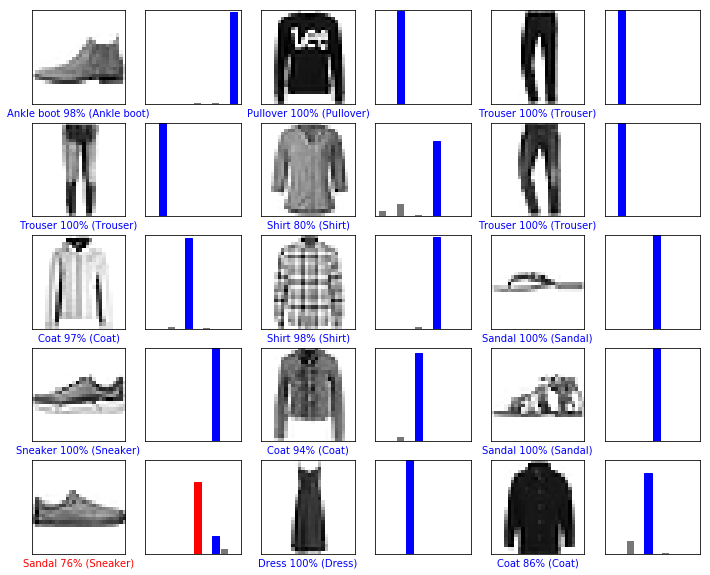

In [23]:
#On refait cela pour les 15 premières images:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [24]:
# Technique pour faire une prévision que sur une seule image:
img = test_images[0] #On récupère l'image

print(img.shape) 


(28, 28)


In [25]:
#Les modèles ont été optimisés pour faire des prédictions sur des listes. Donc même si on ne veut faire de prédiction...
#que sur une seule image, nous devons l'ajouter à une liste:
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [26]:
#A partir de là, le processus est le même que précédament.
predictions_single = model.predict(img)

print(predictions_single)

[[1.89965510e-06 1.01734315e-07 2.40101713e-07 5.42332312e-09
  9.59376848e-07 8.98214616e-03 1.24812891e-06 1.22553455e-02
  7.29301632e-07 9.78757322e-01]]


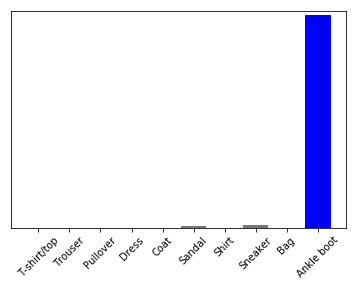

In [27]:
plot_value_array(0, predictions_single, test_labels)
_=plt.xticks(range(10), class_names, rotation=45) # Permet d'afficher le nom des labels en abscisse. 


In [28]:
np.argmax(predictions_single[0])


9